<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Utilities" data-toc-modified-id="Utilities-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Utilities</a></span><ul class="toc-item"><li><span><a href="#Dictionaries" data-toc-modified-id="Dictionaries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dictionaries</a></span></li><li><span><a href="#Function-to-plot-collision-(obsoleted,-to-be-updated)" data-toc-modified-id="Function-to-plot-collision-(obsoleted,-to-be-updated)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Function to plot collision (obsoleted, to be updated)</a></span></li></ul></li><li><span><a href="#Run-the-collisions" data-toc-modified-id="Run-the-collisions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Run the collisions</a></span></li><li><span><a href="#Make-plots" data-toc-modified-id="Make-plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Make plots</a></span><ul class="toc-item"><li><span><a href="#N_part-v.s-b-for-a-certain-XS_NN" data-toc-modified-id="N_part-v.s-b-for-a-certain-XS_NN-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>N_part v.s b for a certain XS_NN</a></span></li><li><span><a href="#N_spec-v.s-b-for-a-certain-XS_NN" data-toc-modified-id="N_spec-v.s-b-for-a-certain-XS_NN-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>N_spec v.s b for a certain XS_NN</a></span></li><li><span><a href="#N_part/N_total-v.s-b-for-a-certain-XS_NN" data-toc-modified-id="N_part/N_total-v.s-b-for-a-certain-XS_NN-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>N_part/N_total v.s b for a certain XS_NN</a></span></li><li><span><a href="#N_spec/N_total-v.s-b-for-a-certain-XS_NN" data-toc-modified-id="N_spec/N_total-v.s-b-for-a-certain-XS_NN-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>N_spec/N_total v.s b for a certain XS_NN</a></span></li><li><span><a href="#N_part-v.s-b-with-different-XS_NN-for-a-certain-nucleus" data-toc-modified-id="N_part-v.s-b-with-different-XS_NN-for-a-certain-nucleus-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>N_part v.s b with different XS_NN for a certain nucleus</a></span></li><li><span><a href="#N_spec-v.s-b-with-different-XS_NN-for-a-certain-nucleus" data-toc-modified-id="N_spec-v.s-b-with-different-XS_NN-for-a-certain-nucleus-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>N_spec v.s b with different XS_NN for a certain nucleus</a></span></li><li><span><a href="#N_coll-per-nucleon-v.s-b-with-different-XS_NN-for-a-certain-nucleus" data-toc-modified-id="N_coll-per-nucleon-v.s-b-with-different-XS_NN-for-a-certain-nucleus-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>N_coll per nucleon v.s b with different XS_NN for a certain nucleus</a></span></li><li><span><a href="#N_coll-per-nucleon-v.s-b-for-a-certain-XS_NN" data-toc-modified-id="N_coll-per-nucleon-v.s-b-for-a-certain-XS_NN-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>N_coll per nucleon v.s b for a certain XS_NN</a></span></li></ul></li></ul></div>

In [2]:
import numpy as np
import pandas as pd
import pickle
import ROOT
from array import array
import tdrstyle as tdr
import os
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from array import array as ary
import math
import pickle

from GlauberMC_classes import *
from GlauberMC_Utilities import *

%jsroot on
ROOT.gStyle.SetOptStat(0)

tdr.setTDRStyle()

Welcome to JupyROOT 6.14/04


# Utilities #
## Dictionaries ##

In [3]:
dic_Z={'Si_28':28.,
       'S_32':32.,
       'Ca_40':40.,
       'Ni_58':58.,
       'Cu_62':62.,
       'Au_197':197.,
       'Pb_207':207.}

dic_a={'Si_28':0.580,
       'S_32':2.191,
       'Ca_40':0.586,
       'Ni_58':0.517,
       'Cu_62':0.596,
       'Au_197':0.535,
       'Pb_207':0.546}

dic_w={'Si_28':-0.233,
       'S_32':0.16,
       'Ca_40':-0.161,
       'Ni_58':-0.1308,
       'Cu_62':0.,
       'Au_197':0.,
       'Pb_207':0.}

## Function to plot collision (obsoleted, to be updated) ##

In [3]:
def plot_collision(NucA, NucB):
    list_nucleus = []
    list_nucleus.append(NucA)
    list_nucleus.append(NucB)

    canvas = ROOT.TCanvas('c', 'c', 800, 700)
    canvas.cd()
    h2f = ROOT.TH2F("hGlauberMC", "", 160, -16, 16, 140, -14, 14)
    h2f.Reset()
    h2f.SetStats(0)
    h2f.GetXaxis().SetTitle('x (fm)')
    h2f.GetYaxis().SetTitle('y (fm)')
    h2f.Draw()

    ltx = ROOT.TLatex()
    ltx.SetNDC()
    ltx.SetTextFont(42)
    ltx.SetTextSize(0.04)
    ltx.DrawLatex(0.22, 0.86, 'Nucleus: {0}'.format(
        NucA.name.split('_', 1)[0]))
    ltx.DrawLatex(0.22, 0.81, 'Impact parameter b = {0:.1f} fm'.format(math.fabs(NucA.x-NucB.x)))
    ltx.DrawLatex(0.22, 0.76, '#sigma_{NN}' + ' = {0:.1f} mb'.format(NucA.xsec_NN))

    for i in range(len(list_nucleus)):
        list_nucleus[i].ellipse.SetFillStyle(0)
        list_nucleus[i].ellipse.SetLineStyle(9)
        list_nucleus[i].ellipse.Draw()
        if i == 1:
            list_nucleus[i].ellipse.Draw('same')
        for inuc in range(len(list_nucleus[i].list_nuclei)):
            list_nucleus[i].list_nuclei[inuc].ellipse.SetFillStyle(0)
            list_nucleus[i].list_nuclei[inuc].ellipse.SetLineStyle(7)
            list_nucleus[i].list_nuclei[inuc].ellipse.SetLineColor(2 * (i + 1))
            if list_nucleus[i].list_nuclei[inuc].Participant == True:
                list_nucleus[i].list_nuclei[inuc].ellipse.SetLineWidth(2)
                list_nucleus[i].list_nuclei[inuc].ellipse.SetLineStyle(1)

            list_nucleus[i].list_nuclei[inuc].ellipse.Draw('same')

    # canvas.Update()
    # canvas.Draw()
    os.makedirs('./plot-event', exist_ok=True)
    os.makedirs('./plot-event/{0}'.format(NucA.name), exist_ok=True)
    canvas.SaveAs('./plot-event/{0}/{1}-IP{2:.1f}fm-XS_NN{3:.1f}mb.png'.format(NucA.name,
        NucA.name.split('_', 1)[0], math.fabs(NucA.x-NucB.x), NucA.xsec_NN))
    canvas.SaveAs('./plot-event/{0}/{1}-IP{2:.1f}fm-XS_NN{3:.1f}mb.pdf'.format(NucA.name,
        NucA.name.split('_', 1)[0], math.fabs(NucA.x-NucB.x), NucA.xsec_NN))
    
    del canvas

# Run the collisions #

In [4]:
step_b = 0.1
MakePlots = False
Verbose = False
random = ROOT.TRandom3()

In [29]:
for iNucType in range(len(list(dic_Z.keys()))):
    Nuclei_type = list(dic_Z.keys())[iNucType]
    os.makedirs('collision-data/', exist_ok=True)
    os.makedirs('collision-data/{0}'.format(Nuclei_type), exist_ok=True)
    
    print (Nuclei_type)

    for ib in range(0, 201, 1):
        for iXSNN in range(42, 102, 10):

            D = pow(0.1 * iXSNN / math.pi, 1. / 2.)  # [fm]
            b = ib * step_b

            if Verbose == True:
                print('Impact parameter:', b,
                      '\nNucleon-nucleon cross section: ', iXSNN,
                      '\nBall diameter:', D, '\nNuclei type:', Nuclei_type,
                      'nuclear radius:',
                      1.2 * pow(dic_Z.get(Nuclei_type), 1. / 3.))

            NucleusA = nucleus(Nuclei_type, 0 + b / 2., 0., 0.,
                               dic_Z.get(Nuclei_type), dic_a.get(Nuclei_type),
                               dic_w.get(Nuclei_type), iXSNN, MakePlots)
            NucleusB = nucleus(Nuclei_type, 0 - b / 2., 0., 0.,
                               dic_Z.get(Nuclei_type), dic_a.get(Nuclei_type),
                               dic_w.get(Nuclei_type), iXSNN, MakePlots)
            Fill_nuclei(NucleusA, MakePlots)
            Fill_nuclei(NucleusB, MakePlots)

            # Make collision
            Collision(NucleusA, NucleusB)
            Event = Collision_Event(NucleusA, NucleusB, b)
            Event.SetEvent()
            f_data = open(
                './collision-data/{0}/Collision_{1}-IP{2:.1f}fm-XS_NN{3:.1f}mb.pkl'
                .format(Nuclei_type,
                        Nuclei_type.split('_', 1)[0], b, iXSNN), 'wb')
            pickle.dump(Event, f_data)
            f_data.close()

            if MakePlots == True:
                plot_collision(NucleusA, NucleusB)

            del NucleusA, NucleusB, Event, f_data

Si_28
S_32
Ca_40
Ni_58
Cu_62
Au_197
Pb_207


Warning in <TF1::GetRandom>: function:fermi has 62 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 62 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 62 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 62 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 62 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 62 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 62 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 62 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 62 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 62 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 62 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 62 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fe

# Make plots #
##  N_part v.s b for a certain XS_NN ##

42 Si_28
42 S_32
42 Ca_40
42 Ni_58
42 Cu_62
42 Au_197
42 Pb_207
52 Si_28
52 S_32
52 Ca_40
52 Ni_58
52 Cu_62
52 Au_197
52 Pb_207
62 Si_28
62 S_32
62 Ca_40
62 Ni_58
62 Cu_62
62 Au_197
62 Pb_207
72 Si_28
72 S_32
72 Ca_40
72 Ni_58
72 Cu_62
72 Au_197
72 Pb_207
82 Si_28
82 S_32
82 Ca_40
82 Ni_58
82 Cu_62
82 Au_197
82 Pb_207
92 Si_28
92 S_32
92 Ca_40
92 Ni_58
92 Cu_62
92 Au_197
92 Pb_207


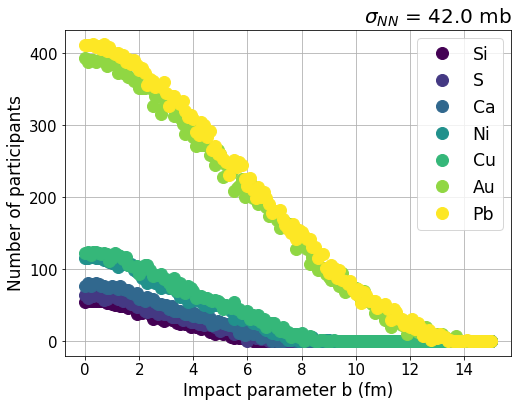

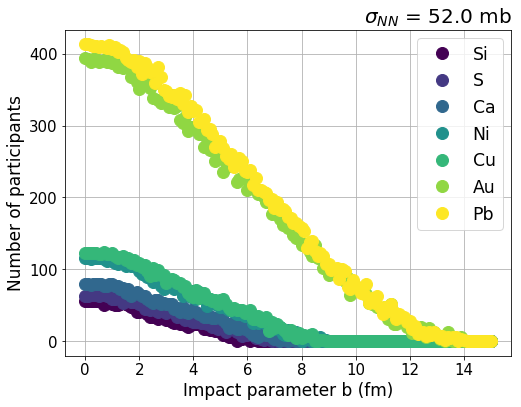

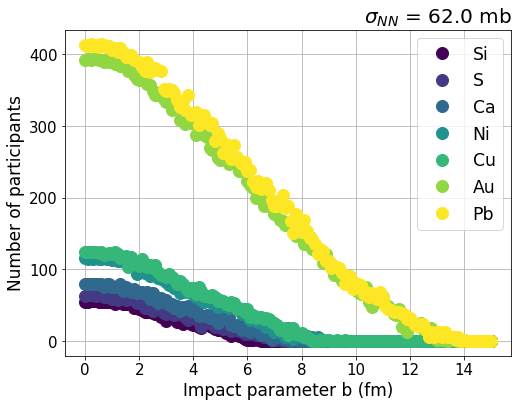

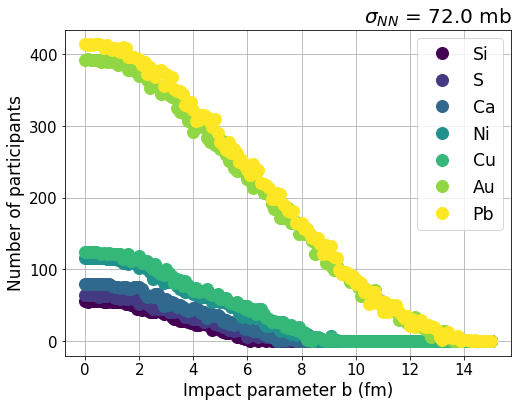

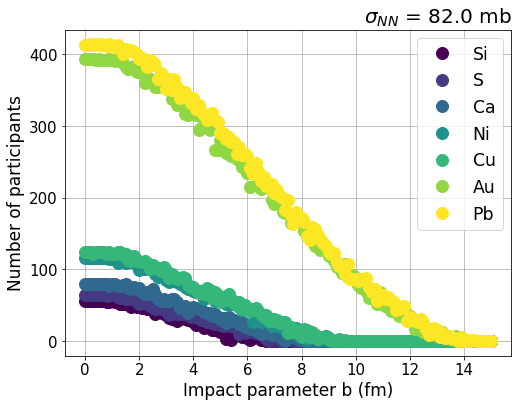

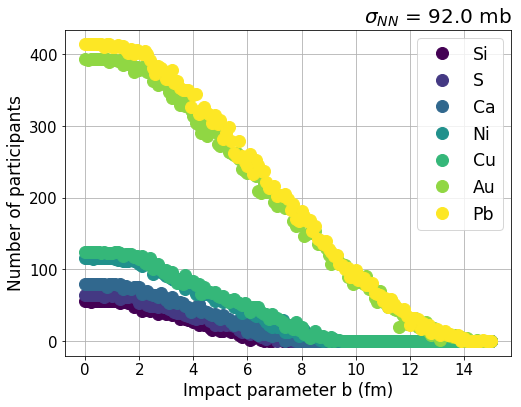

In [31]:
step_b = 0.1

for iXSNN in range(42,102,10):
    list_b = []
    list_part_AllNuc = []
    list_b.clear()
    list_part_AllNuc.clear()
    for iNuc in range(len(list(dic_Z.keys()))):
        list_part = []
        list_part.clear()
        print (iXSNN, list(dic_Z.keys())[iNuc])
        for ib in range(0, 151, 1):
            b = ib * step_b
            if iNuc == 0:
                list_b.append(b)
                
            infile = open('./collision-data/{0}/Collision_{1}-IP{2:.1f}fm-XS_NN{3:.1f}mb.pkl'
                    .format(list(dic_Z.keys())[iNuc],
                            list(dic_Z.keys())[iNuc].split('_', 1)[0], b, iXSNN), 'rb')
            
            Event = pickle.load(infile)
            list_part.append(Event.Npart)
            
            infile.close()
            del Event, infile

        list_part_AllNuc.append(list_part)
        
        del list_part



    cmap = plt.cm.viridis
    rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, len(list_part_AllNuc))))

    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111)
    ax.set_title('$\sigma_{NN}$'+' = {0:.1f} mb'.format(iXSNN), fontsize=20, loc='right')
    labels = []
    for i in range(len(list_part_AllNuc)):
        plt.plot(list_b, list_part_AllNuc[i], marker='o', markersize=12, linestyle='None')
        labels.append(list(dic_Z.keys())[i].split('_', 1)[0])
    plt.xlabel('Impact parameter b (fm)', fontsize=17)
    plt.ylabel('Number of participants', fontsize=17)
    plt.tick_params(labelsize=15)
    plt.grid(True)
    plt.legend(labels,fontsize='xx-large')
    os.makedirs('./plot-analysis', exist_ok=True)
    plt.savefig('./plot-analysis/NumParti-vs-IP_XSNN{0:.1f}mb.png'.format(iXSNN))
    plt.savefig('./plot-analysis/NumParti-vs-IP_XSNN{0:.1f}mb.pdf'.format(iXSNN))
    # plt.show()
    # plt.close()

## N_spec v.s b for a certain XS_NN ## 

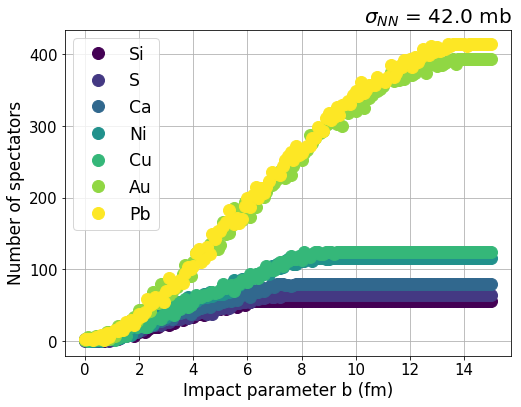

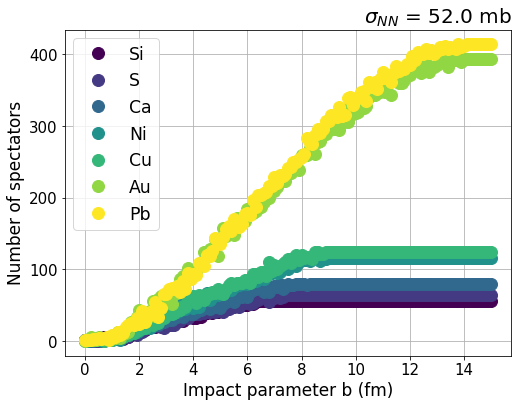

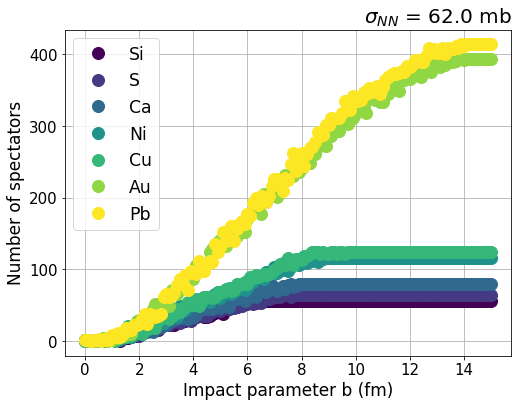

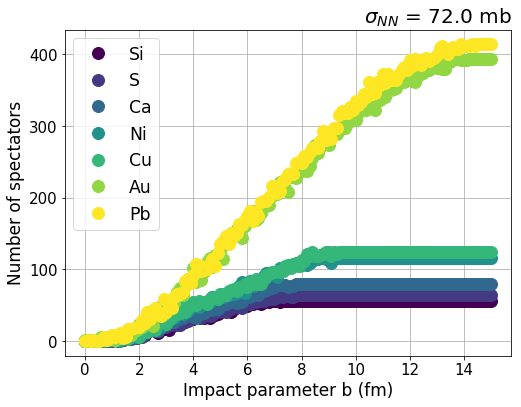

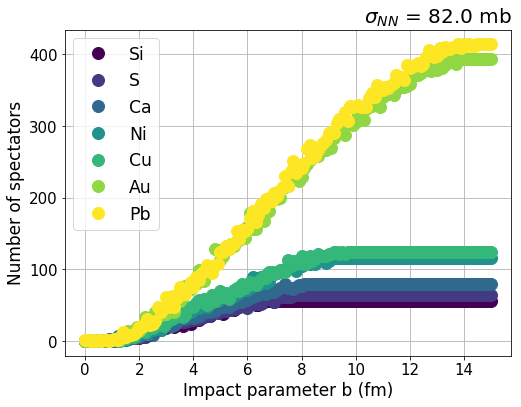

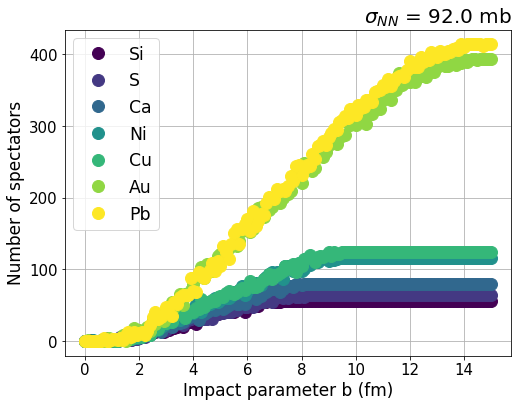

In [7]:
step_b = 0.1

for iXSNN in range(42,102,10):
    list_b = []
    list_spec_AllNuc = []
    list_b.clear()
    list_spec_AllNuc.clear()
    for iNuc in range(len(list(dic_Z.keys()))):
        list_spec = []
        list_spec.clear()
        for ib in range(0, 151, 1):
            b = ib * step_b
            if iNuc == 0:
                list_b.append(b)

            infile = open('./collision-data/{0}/Collision_{1}-IP{2:.1f}fm-XS_NN{3:.1f}mb.pkl'
                    .format(list(dic_Z.keys())[iNuc],
                            list(dic_Z.keys())[iNuc].split('_', 1)[0], b, iXSNN), 'rb')
            Event = pickle.load(infile)
            list_spec.append((Event.NucA.Z+Event.NucB.Z)-Event.Npart)
            
            infile.close()
            del Event, infile

        list_spec_AllNuc.append(list_spec)
        del list_spec


    cmap = plt.cm.viridis
    rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, len(list_spec_AllNuc))))

    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111)
    ax.set_title('$\sigma_{NN}$'+' = {0:.1f} mb'.format(iXSNN), fontsize=20, loc='right')
    labels = []
    for i in range(len(list_spec_AllNuc)):
        plt.plot(list_b, list_spec_AllNuc[i], marker='o', markersize=12, linestyle='None')
        labels.append(list(dic_Z.keys())[i].split('_', 1)[0])
    plt.xlabel('Impact parameter b (fm)', fontsize=17)
    plt.ylabel('Number of spectators', fontsize=17)
    plt.tick_params(labelsize=15)
    plt.grid(True)
    plt.legend(labels,fontsize='xx-large')
    os.makedirs('./plot-analysis', exist_ok=True)
    plt.savefig('./plot-analysis/NumSpect-vs-IP_XSNN{0:.1f}mb.png'.format(iXSNN))
    plt.savefig('./plot-analysis/NumSpect-vs-IP_XSNN{0:.1f}mb.pdf'.format(iXSNN))
    # plt.show()
    # plt.close()

## N_part/N_total v.s b for a certain XS_NN ## 

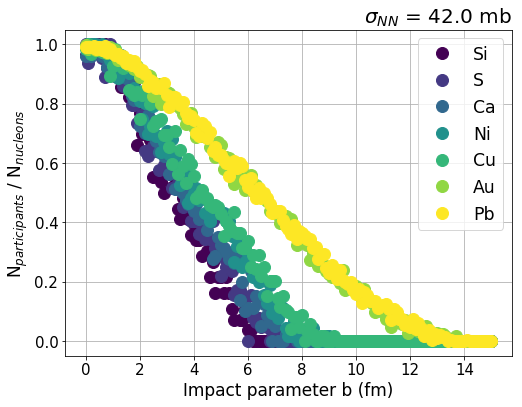

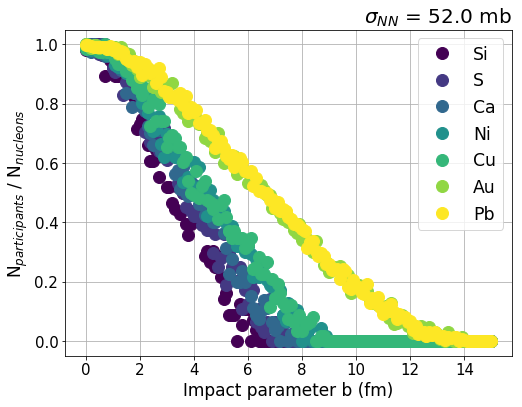

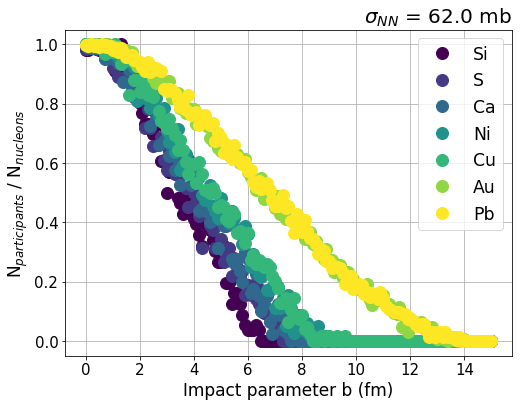

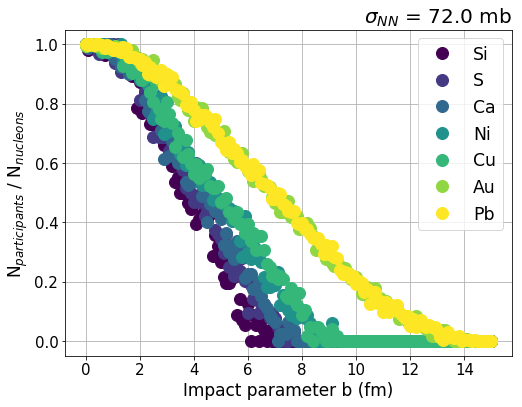

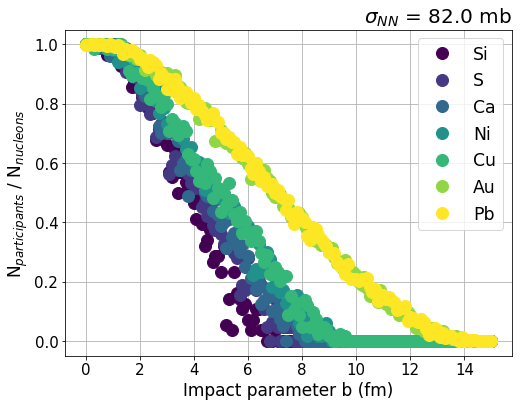

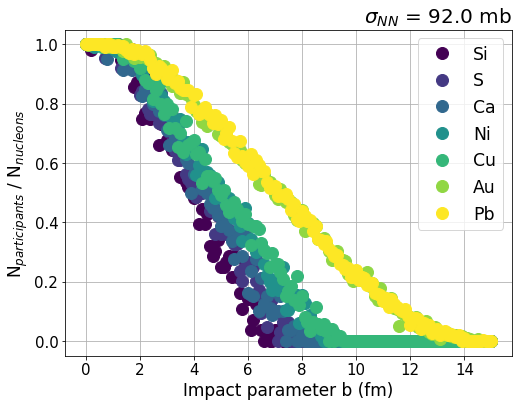

In [9]:
step_b = 0.1

for iXSNN in range(42,102,10):
    list_b = []
    list_part_AllNuc = []
    list_b.clear()
    list_part_AllNuc.clear()
    for iNuc in range(len(list(dic_Z.keys()))):
        list_part = []
        list_part.clear()
        for ib in range(0, 151, 1):
            b = ib * step_b
            if iNuc == 0:
                list_b.append(b)

            infile = open(
                './collision-data/{0}/Collision_{1}-IP{2:.1f}fm-XS_NN{3:.1f}mb.pkl'
                .format(
                    list(dic_Z.keys())[iNuc],
                    list(dic_Z.keys())[iNuc].split('_', 1)[0], b, iXSNN), 'rb')
            Event = pickle.load(infile)
            list_part.append(Event.Npart / (Event.NucA.Z+Event.NucB.Z))

        list_part_AllNuc.append(list_part)

    cmap = plt.cm.viridis
    rcParams['axes.prop_cycle'] = cycler(
        color=cmap(np.linspace(0, 1, len(list_part_AllNuc))))

    fig = plt.figure(figsize=(8, 6))
    ax = plt.subplot(111)
    ax.set_title(
        '$\sigma_{NN}$' + ' = {0:.1f} mb'.format(iXSNN), fontsize=20, loc='right')
    labels = []
    for i in range(len(list_part_AllNuc)):
        plt.plot(
            list_b,
            list_part_AllNuc[i],
            marker='o',
            markersize=12,
            linestyle='None')
        labels.append(list(dic_Z.keys())[i].split('_', 1)[0])
    plt.xlabel('Impact parameter b (fm)', fontsize=17)
    plt.ylabel('N$_{participants}$ / N$_{nucleons}$', fontsize=17)
    plt.tick_params(labelsize=15)
    plt.grid(True)
    plt.legend(labels, fontsize='xx-large')
    os.makedirs('./plot-analysis', exist_ok=True)
    plt.savefig(
        './plot-analysis/RatioNumParti-vs-IP_XSNN{0:.1f}mb.png'.format(iXSNN))
    plt.savefig(
        './plot-analysis/RatioNumParti-vs-IP_XSNN{0:.1f}mb.pdf'.format(iXSNN))
    # plt.show()
    # plt.close()

## N_spec/N_total v.s b for a certain XS_NN ## 

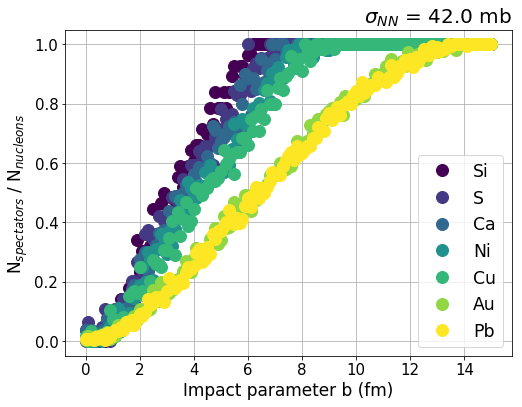

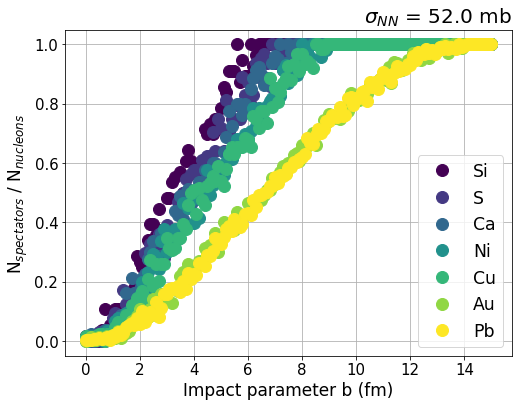

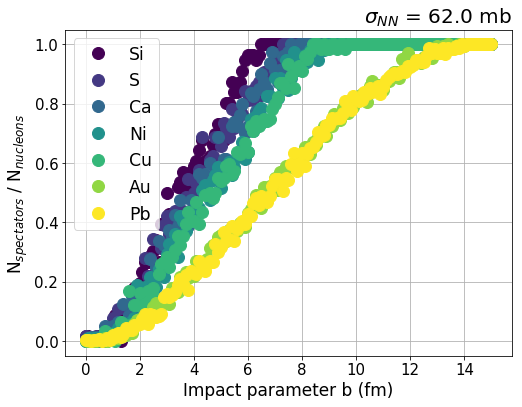

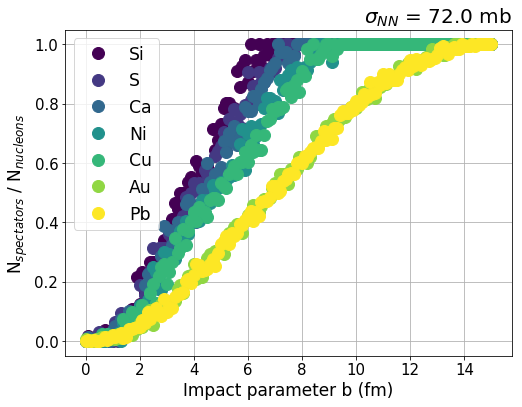

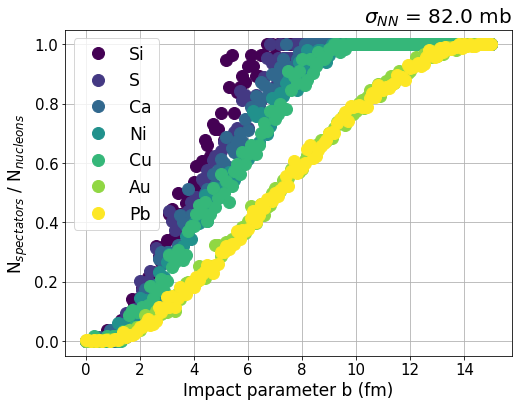

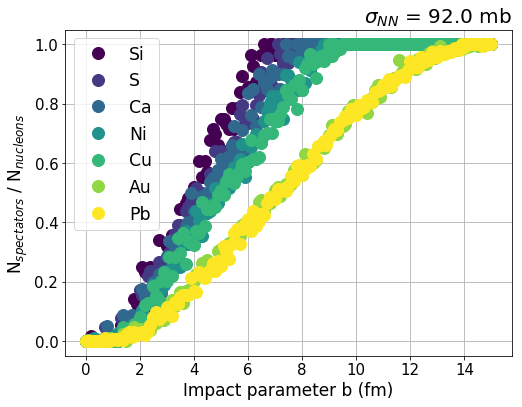

In [11]:
step_b = 0.1

for iXSNN in range(42,102,10):
    list_b = []
    list_spec_AllNuc = []
    list_b.clear()
    list_spec_AllNuc.clear()
    for iNuc in range(len(list(dic_Z.keys()))):
        list_spec = []
        list_spec.clear()
        for ib in range(0, 151, 1):
            b = ib * step_b
            if iNuc == 0:
                list_b.append(b)

            infile = open(
                './collision-data/{0}/Collision_{1}-IP{2:.1f}fm-XS_NN{3:.1f}mb.pkl'
                .format(
                    list(dic_Z.keys())[iNuc],
                    list(dic_Z.keys())[iNuc].split('_', 1)[0], b, iXSNN), 'rb')
            Event = pickle.load(infile)
            list_spec.append(((Event.NucA.Z+Event.NucB.Z)-Event.Npart)/(Event.NucA.Z+Event.NucB.Z))

        list_spec_AllNuc.append(list_spec)

    cmap = plt.cm.viridis
    rcParams['axes.prop_cycle'] = cycler(
        color=cmap(np.linspace(0, 1, len(list_spec_AllNuc))))

    fig = plt.figure(figsize=(8, 6))
    ax = plt.subplot(111)
    ax.set_title(
        '$\sigma_{NN}$' + ' = {0:.1f} mb'.format(iXSNN), fontsize=20, loc='right')
    labels = []
    for i in range(len(list_spec_AllNuc)):
        plt.plot(
            list_b,
            list_spec_AllNuc[i],
            marker='o',
            markersize=12,
            linestyle='None')
        labels.append(list(dic_Z.keys())[i].split('_', 1)[0])
    plt.xlabel('Impact parameter b (fm)', fontsize=17)
    plt.ylabel('N$_{spectators}$ / N$_{nucleons}$', fontsize=17)
    plt.tick_params(labelsize=15)
    plt.grid(True)
    plt.legend(labels, fontsize='xx-large')
    os.makedirs('./plot-analysis', exist_ok=True)
    plt.savefig(
        './plot-analysis/RatioNumSpect-vs-IP_XSNN{0:.1f}mb.png'.format(iXSNN))
    plt.savefig(
        './plot-analysis/RatioNumSpect-vs-IP_XSNN{0:.1f}mb.pdf'.format(iXSNN))
    # plt.show()
    # plt.close()

## N_part v.s b with different XS_NN for a certain nucleus  ## 

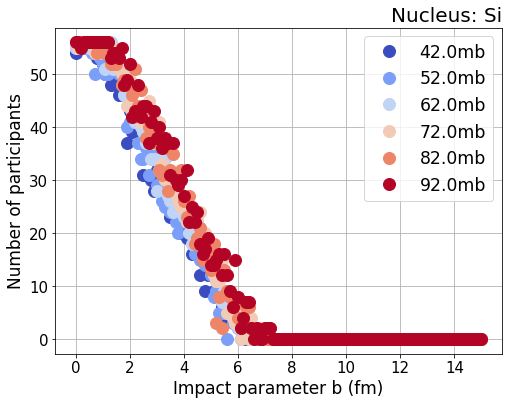

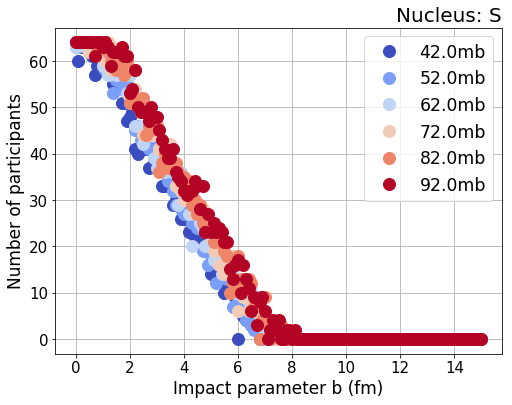

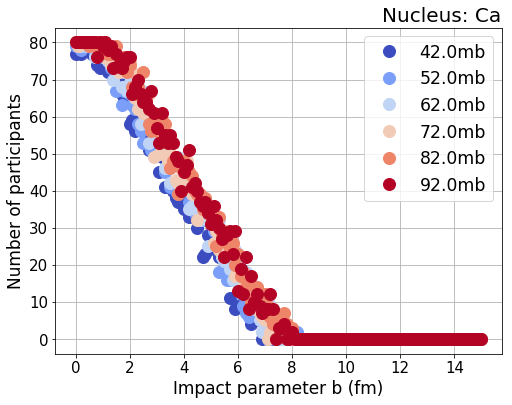

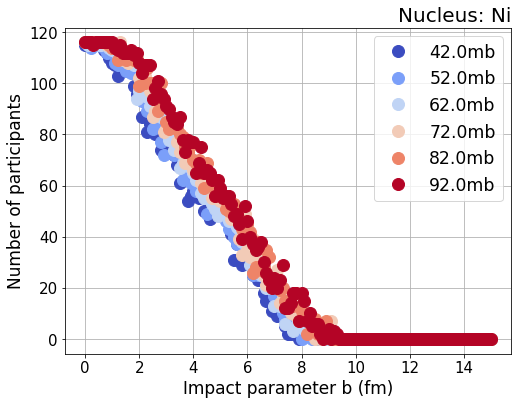

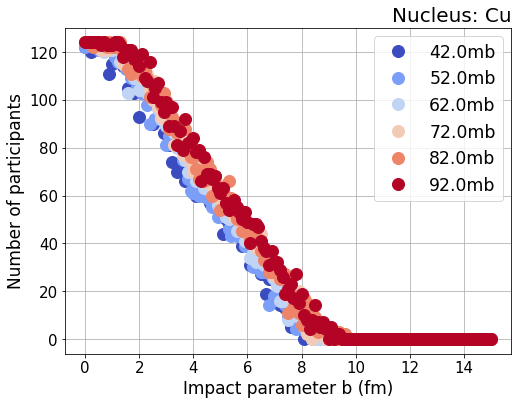

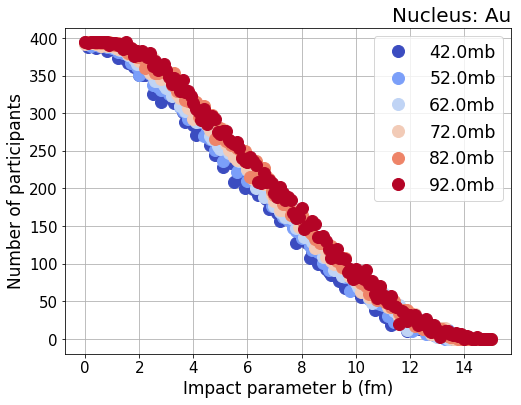

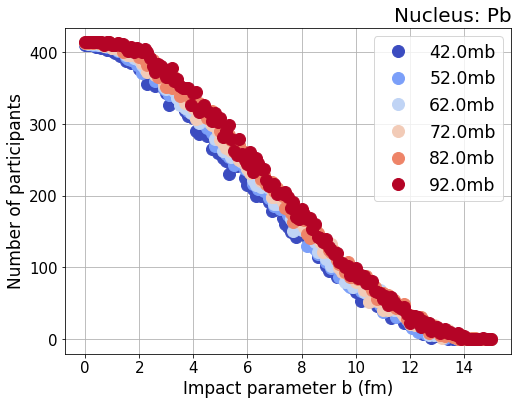

In [13]:
step_b = 0.1

cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 6)))


for iNuc in range(len(list(dic_Z.keys()))):
    list_b = []
    list_part_XSNN = []
    labels_XSNN = []
    list_part_XSNN.clear()
    labels_XSNN.clear()
    
    for iXSNN in range(42, 102, 10):
        list_part = []
        list_part.clear()
        labels_XSNN.append(iXSNN)
        for ib in range(0, 151, 1):
            b = ib * step_b
            if iXSNN == 42:
                list_b.append(b)

            infile = open('./collision-data/{0}/Collision_{1}-IP{2:.1f}fm-XS_NN{3:.1f}mb.pkl'
                    .format(list(dic_Z.keys())[iNuc],
                            list(dic_Z.keys())[iNuc].split('_', 1)[0], b, iXSNN), 'rb')
            Event = pickle.load(infile)
            list_part.append(Event.Npart)

        list_part_XSNN.append(list_part)
        del list_part
    
    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111)
    ax.set_title('Nucleus: {0}'.format(list(dic_Z.keys())[iNuc].split('_', 1)[0]), fontsize=20, loc='right')
    labels = []
    for i in range(len(list_part_XSNN)):
        plt.plot(list_b, list_part_XSNN[i], marker='o', markersize=12, linestyle='None')
        labels.append('{0:.1f}mb'.format(labels_XSNN[i]))
    plt.xlabel('Impact parameter b (fm)', fontsize=17)
    plt.ylabel('Number of participants', fontsize=17)
    plt.tick_params(labelsize=15)
    plt.grid(True)
    plt.legend(labels,fontsize='xx-large')
    os.makedirs('./plot-analysis', exist_ok=True)
    plt.savefig('./plot-analysis/NumParti-vs-IP_XSNN_{0}.png'.format(list(dic_Z.keys())[iNuc]))
    plt.savefig('./plot-analysis/NumParti-vs-IP_XSNN_{0}.pdf'.format(list(dic_Z.keys())[iNuc]))
    # plt.show()
    # plt.close()

## N_spec v.s b with different XS_NN for a certain nucleus  ## 

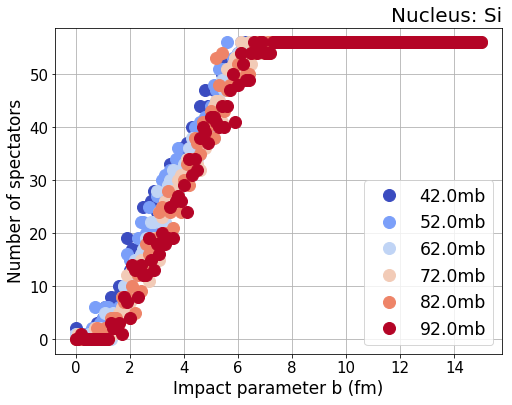

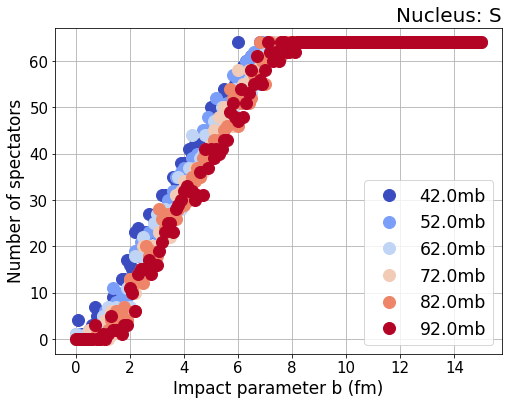

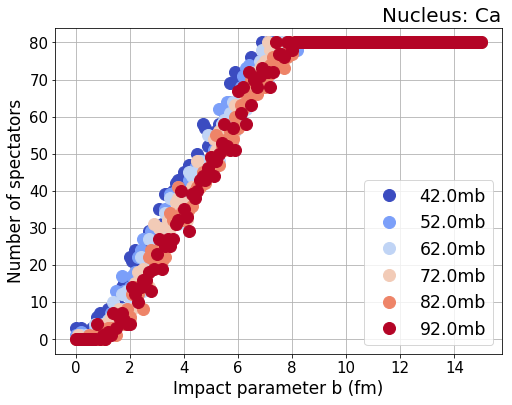

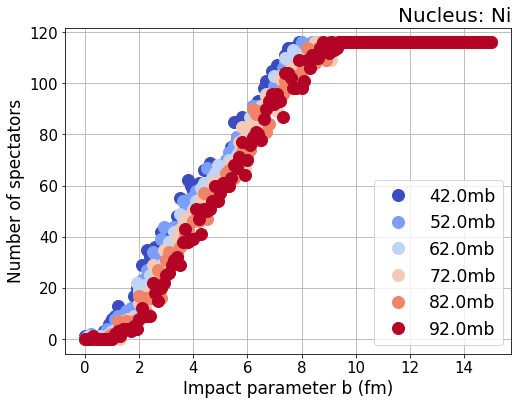

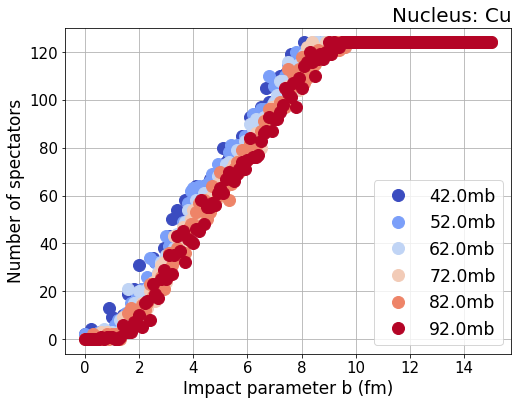

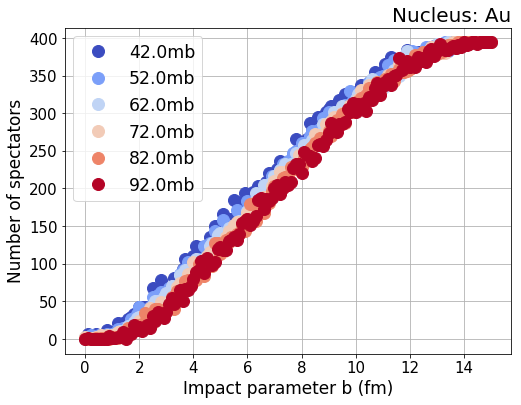

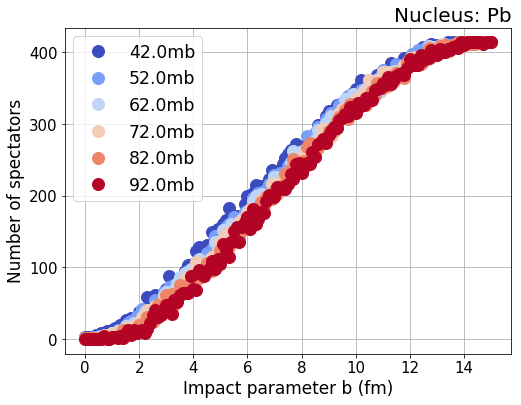

In [14]:
step_b = 0.1

cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 6)))


for iNuc in range(len(list(dic_Z.keys()))):
    list_b = []
    list_spec_XSNN = []
    labels_XSNN = []
    list_spec_XSNN.clear()
    labels_XSNN.clear()
    
    for iXSNN in range(42, 102, 10):
        list_spec = []
        list_spec.clear()
        labels_XSNN.append(iXSNN)
        for ib in range(0, 151, 1):
            b = ib * step_b
            if iXSNN == 42:
                list_b.append(b)

            infile = open('./collision-data/{0}/Collision_{1}-IP{2:.1f}fm-XS_NN{3:.1f}mb.pkl'
                    .format(list(dic_Z.keys())[iNuc],
                            list(dic_Z.keys())[iNuc].split('_', 1)[0], b, iXSNN), 'rb')
            Event = pickle.load(infile)
            list_spec.append(Event.NucA.Z+Event.NucB.Z-Event.Npart)

        list_spec_XSNN.append(list_spec)
        del list_spec
    
    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111)
    ax.set_title('Nucleus: {0}'.format(list(dic_Z.keys())[iNuc].split('_', 1)[0]), fontsize=20, loc='right')
    labels = []
    for i in range(len(list_spec_XSNN)):
        plt.plot(list_b, list_spec_XSNN[i], marker='o', markersize=12, linestyle='None')
        labels.append('{0:.1f}mb'.format(labels_XSNN[i]))
    plt.xlabel('Impact parameter b (fm)', fontsize=17)
    plt.ylabel('Number of spectators', fontsize=17)
    plt.tick_params(labelsize=15)
    plt.grid(True)
    plt.legend(labels,fontsize='xx-large')
    os.makedirs('./plot-analysis', exist_ok=True)
    plt.savefig('./plot-analysis/NumSpect-vs-IP_XSNN_{0}.png'.format(list(dic_Z.keys())[iNuc]))
    plt.savefig('./plot-analysis/NumSpect-vs-IP_XSNN_{0}.pdf'.format(list(dic_Z.keys())[iNuc]))
    # plt.show()
    # plt.close()

## N_coll per nucleon v.s b with different XS_NN for a certain nucleus

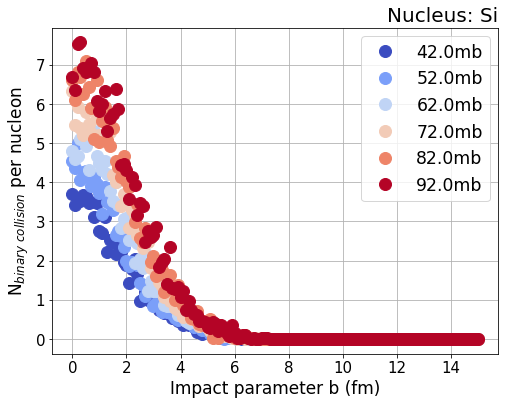

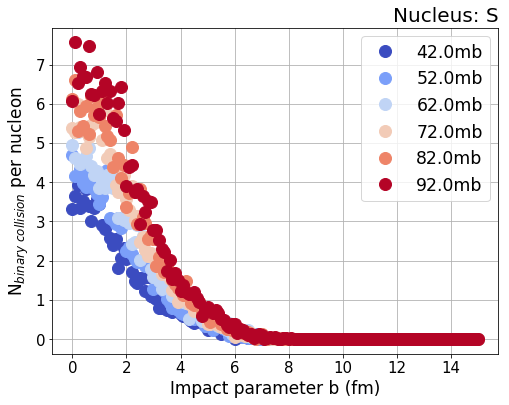

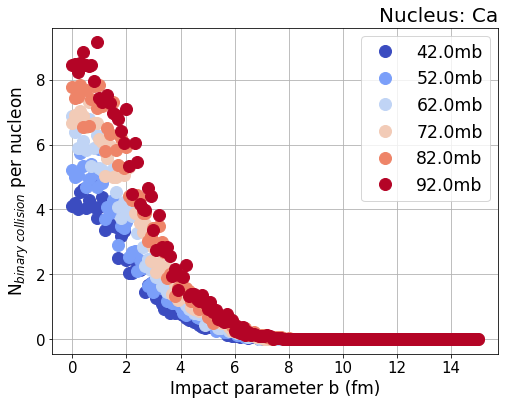

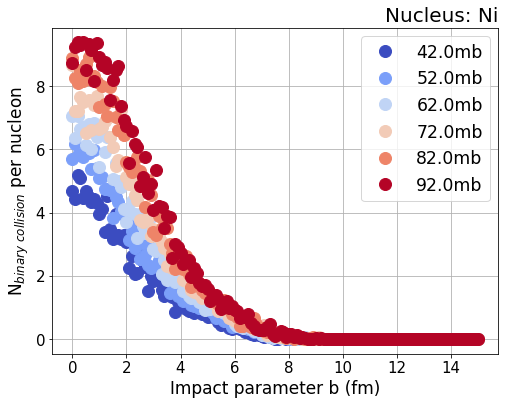

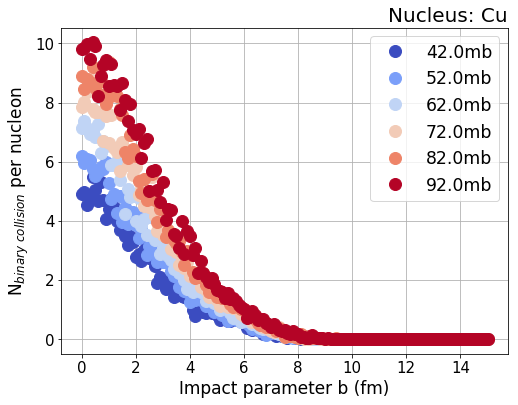

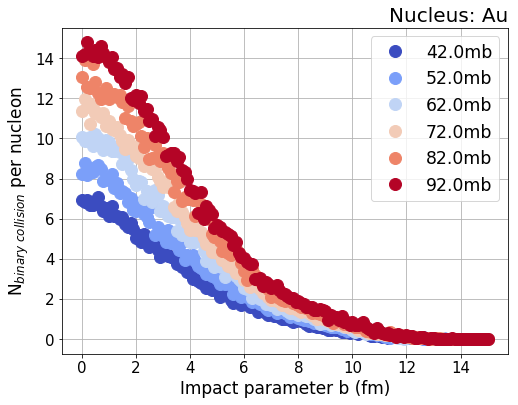

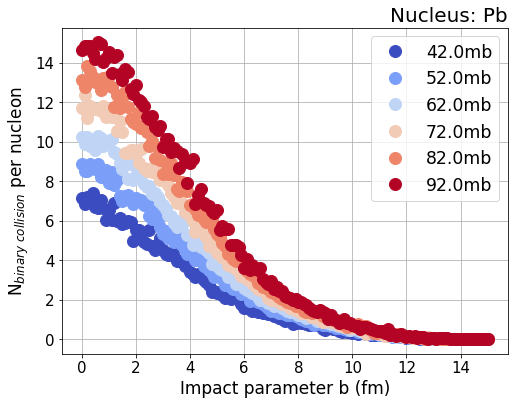

In [16]:
step_b = 0.1

cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 6)))


for iNuc in range(len(list(dic_Z.keys()))):
    list_b = []
    list_coll_XSNN = []
    labels_XSNN = []
    list_coll_XSNN.clear()
    labels_XSNN.clear()
    
    for iXSNN in range(42, 102, 10):
        list_coll = []
        list_coll.clear()
        labels_XSNN.append(iXSNN)
        for ib in range(0, 151, 1):
            b = ib * step_b
            if iXSNN == 42:
                list_b.append(b)

            infile = open('./collision-data/{0}/Collision_{1}-IP{2:.1f}fm-XS_NN{3:.1f}mb.pkl'
                    .format(list(dic_Z.keys())[iNuc],
                            list(dic_Z.keys())[iNuc].split('_', 1)[0], b, iXSNN), 'rb')
            Event = pickle.load(infile)
            list_coll.append(Event.Ncoll/(Event.NucA.Z+Event.NucB.Z))

        list_coll_XSNN.append(list_coll)
        del list_coll
    
    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111)
    ax.set_title('Nucleus: {0}'.format(list(dic_Z.keys())[iNuc].split('_', 1)[0]), fontsize=20, loc='right')
    labels = []
    for i in range(len(list_coll_XSNN)):
        plt.plot(list_b, list_coll_XSNN[i], marker='o', markersize=12, linestyle='None')
        labels.append('{0:.1f}mb'.format(labels_XSNN[i]))
    plt.xlabel('Impact parameter b (fm)', fontsize=17)
    plt.ylabel('N$_{binary\ collision}$ per nucleon', fontsize=17)
    plt.tick_params(labelsize=15)
    plt.grid(True)
    plt.legend(labels,fontsize='xx-large')
    os.makedirs('./plot-analysis', exist_ok=True)
    plt.savefig('./plot-analysis/NumCollPerNuc-vs-IP_XSNN_{0}.png'.format(list(dic_Z.keys())[iNuc]))
    plt.savefig('./plot-analysis/NumCollPerNuc-vs-IP_XSNN_{0}.pdf'.format(list(dic_Z.keys())[iNuc]))
    # plt.show()
    # plt.close()

 ## N_coll per nucleon v.s b for a certain XS_NN ##

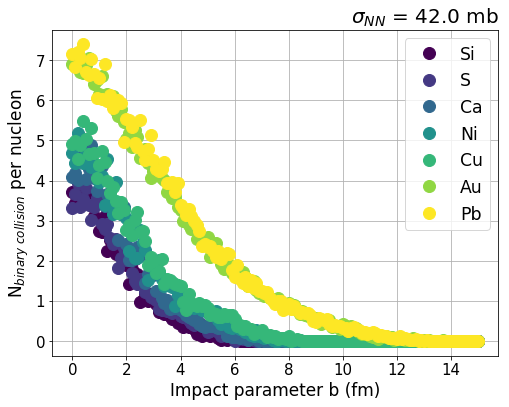

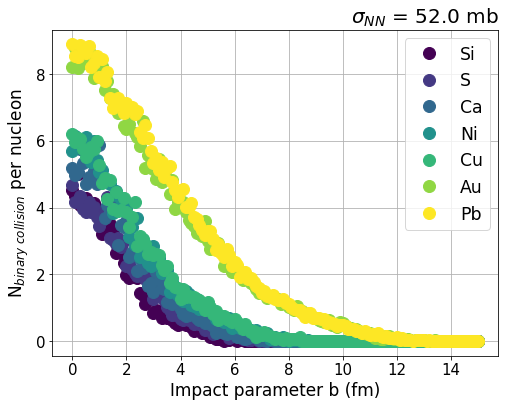

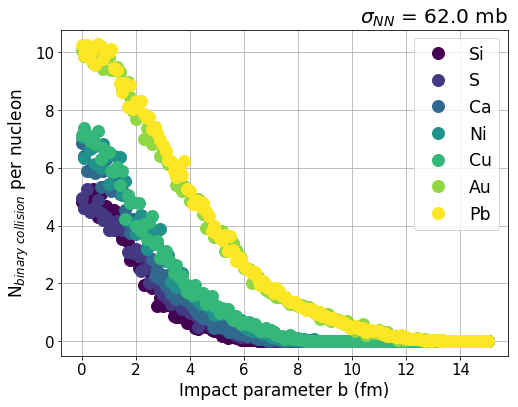

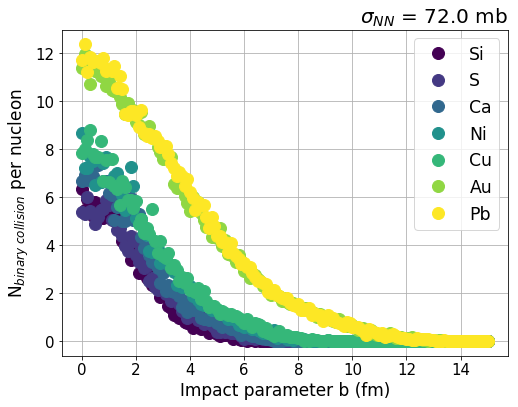

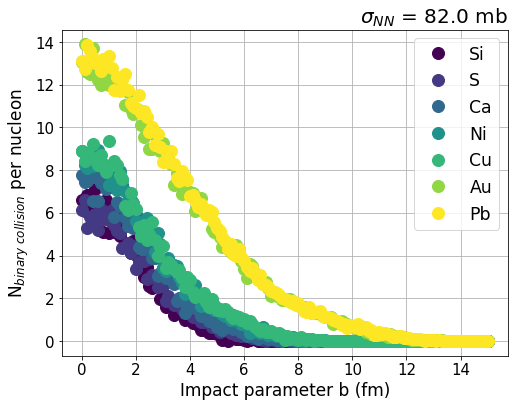

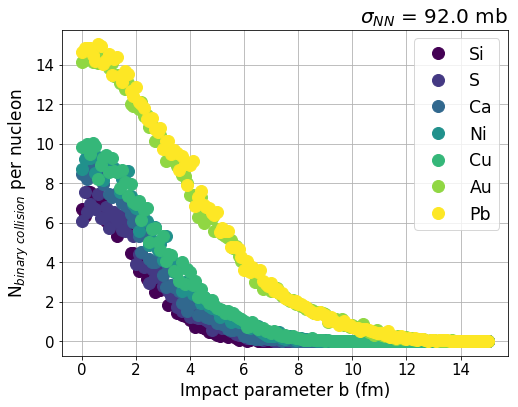

In [17]:
step_b = 0.1

for iXSNN in range(42,102,10):
    list_b = []
    list_coll_AllNuc = []
    list_b.clear()
    list_coll_AllNuc.clear()
    for iNuc in range(len(list(dic_Z.keys()))):
        list_coll = []
        list_coll.clear()
        for ib in range(0, 151, 1):
            b = ib * step_b
            if iNuc == 0:
                list_b.append(b)

            infile = open('./collision-data/{0}/Collision_{1}-IP{2:.1f}fm-XS_NN{3:.1f}mb.pkl'
                    .format(list(dic_Z.keys())[iNuc],
                            list(dic_Z.keys())[iNuc].split('_', 1)[0], b, iXSNN), 'rb')
            Event = pickle.load(infile)
            list_coll.append(Event.Ncoll/(Event.NucA.Z+Event.NucB.Z))

        list_coll_AllNuc.append(list_coll)
        del list_coll



    cmap = plt.cm.viridis
    rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, len(list_coll_AllNuc))))

    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111)
    ax.set_title('$\sigma_{NN}$'+' = {0:.1f} mb'.format(iXSNN), fontsize=20, loc='right')
    labels = []
    for i in range(len(list_coll_AllNuc)):
        plt.plot(list_b, list_coll_AllNuc[i], marker='o', markersize=12, linestyle='None')
        labels.append(list(dic_Z.keys())[i].split('_', 1)[0])
    plt.xlabel('Impact parameter b (fm)', fontsize=17)
    plt.ylabel('N$_{binary\ collision}$ per nucleon', fontsize=17)
    plt.tick_params(labelsize=15)
    plt.grid(True)
    plt.legend(labels,fontsize='xx-large')
    os.makedirs('./plot-analysis', exist_ok=True)
    plt.savefig('./plot-analysis/NumCollPerNuc-vs-IP_XSNN{0:.1f}mb.png'.format(iXSNN))
    plt.savefig('./plot-analysis/NumCollPerNuc-vs-IP_XSNN{0:.1f}mb.pdf'.format(iXSNN))
    # plt.show()
    # plt.close()